# Titanic Data Analysis

   In this project, the titanic data has been investigated through different statistcal approches. We are focusing on factors that affect the rate of survival, such as passenger boarding class, cabin and passenger age, sex. Some interesting questions includes:
   
    1. What is survival probability for female and male passengers in differnt class;
 
    3. What is age distribution of passengers. Does children have 

In [2]:
# import necessary modules 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ggplot
%matplotlib inline 


In [3]:
# Read original csv file into panda dataframe.
# To look at the structure of datafile, we print out the first few rows of the table.

titanic_data = pd.read_csv('~/downloads/titanic-data.csv')

titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


    We are going to concentrate the factors of passenger class and sex that affect survival probability.

In [6]:
# check to see if there is any missing values of the data
print titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


    The above result shows that there are 891 rows in the datafile, and 177 'Age' data is missing, 2 'Embarked' data is missing. So need to drop N/A before doing analysis to the data.

In [7]:
# calculate total number of passengers on board
print 'Total number of passengers:', len(titanic_data),'\n'

# calculate total number of female passengers and male passengers
female_passanger = titanic_data[titanic_data['Sex']=='female']
print 'Number of female passengers:', len(female_passanger), "\n"

male_passanger = titanic_data[titanic_data['Sex']=='male']
print 'Number of male passengers: ', len(male_passanger),'\n'

# calculate number of passengers in different classes
first_class = titanic_data[titanic_data['Pclass']==1]
print 'Number of first class passengers: ', len(first_class),'\n'

second_class = titanic_data[titanic_data['Pclass']==2]
print 'Number of second class passengers: ', len(second_class),'\n'

third_class = titanic_data[titanic_data['Pclass']==3]
print 'Number of third class passengers: ', len(third_class),'\n'

Total number of passengers: 891 

Number of female passengers: 314 

Number of male passengers:  577 

Number of first class passengers:  216 

Number of second class passengers:  184 

Number of third class passengers:  491 



    Number of male passengers is almost double the number of female passengers, the pie chart shows that proportion of female is 35.2%, and 64.8% for male.

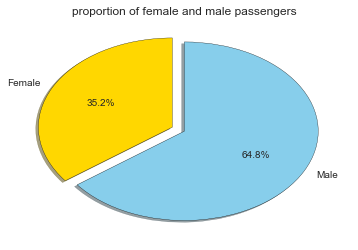

In [40]:
passenger = [314,577]
colors = ['gold', 'skyblue']
labels= 'Female','Male'
explode = (0.1,0) 
plt.pie(passenger,labels=labels,explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('proportion of female and male passengers')

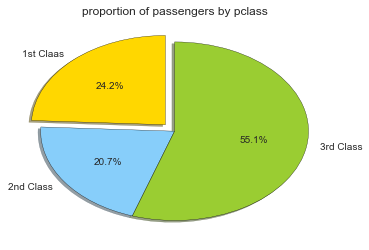

In [42]:
data = [216,184,491]   
colors = ['gold', 'lightskyblue','yellowgreen']
labels= '1st Claas','2nd Class','3rd Class'
explode = (0.1,0,0) 
plt.pie(data,labels=labels,explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('proportion of passengers by pclass')

    Pie chart of passenger in different pclass shows more than half passengers are from third class (55.1%) , and first class (24.2%) is slightly larger than second class(20.7%).

### Survived passengers

In [39]:
# first, 
grouped_gender = titanic_data.groupby(['Survived','Sex'])
print grouped_gender.size()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64


In [11]:
grouped_pclass = titanic_data.groupby(['Survived','Pclass'])
print grouped_pclass.size()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64


### Consider two factors 

In [10]:
# First, group the data in pclass and sex

grouped_gender = titanic_data.groupby('Sex')

grouped_pclass = titanic_data.groupby('Pclass')

grouped_data = titanic_data.groupby(['Pclass','Sex'])

print 'Total Number of passengers:'
print grouped_data.size(),'\n\n'

# calculate the number of survived passengers of each group

print 'Number of survived passengers:'
print grouped_data['Survived'].sum(),'\n\n'

# Survival probability for each pclass 

print 'Survival Probability:'
print grouped_data['Survived'].sum()/grouped_data.size()

Total Number of passengers:
Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64 


Number of survived passengers:
Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64 


Survival Probability:
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
dtype: float64


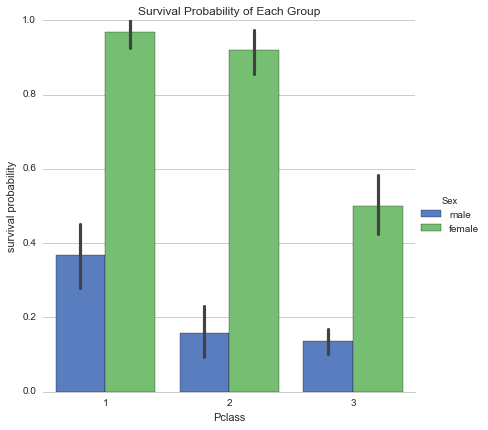

In [110]:
# Draw barplot to show survival for class and sex

sns.set(style="whitegrid")
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=titanic_data,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")
sns.plt.title('Survival Probability of Each Group')

    Survival probability for female is significantly greater than male, more than 90% female in first and second class had survived (96.8%, 92.1% in respective). Maybe it's because female passengers had higher priority to take lifeboats. While survival probability for male in second and third class is relatively low, only 15.7% and 13.5% in respective.

### Passenger Age Distribution

In [21]:
# Then, we'd like to evaluate the 'age' factor, will chindren have high priority to take lifeboat.
# how about 

# get complete 'Age' data, remove missing values
age_data = titanic_data['Age'].dropna()

# descriptive statistics of 'Age' data
print 'Passenger Age Descriptive Statistics:\n', age_data.describe(),'\n'


Passenger Age Descriptive Statistics:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64 



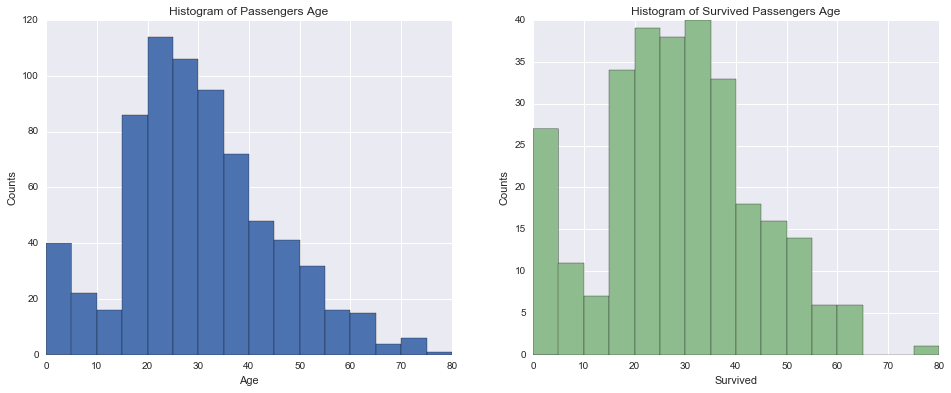

In [33]:
survived = titanic_data[titanic_data['Survived']==1]
not_survived = titanic_data[titanic_data['Survived']==0]

fig, (ax0, ax1) = plt.subplots(1, 2,figsize=[16,6])
ax0.hist(titanic_data['Age'],range=[0,80],bins=16)
ax0.set_title('Histogram of Passengers Age')

# Draw histogram of survived passengers age distribution

ax1.hist(survived['Age'],range=[0,80],bins=16,color='darkseagreen')
ax1.set_title('Histogram of Survived Passengers Age')
ax0.set_xlabel('Age')
ax0.set_ylabel('Counts')
ax1.set_xlabel('Survived')
ax1.set_ylabel('Counts')
plt.show()

     Number of passengers whose age between 15 and 40 is dominating. Children and senior are in the mimority , while children under age of 5 has twice the number for chindren under age of ten.

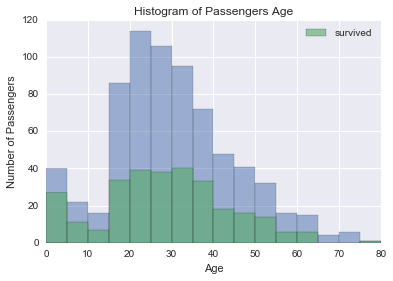

In [29]:
# We also compare the two histograms, to get an approximate proportion of survived passenger in
# each age range. 

plt.style.use('seaborn-deep')
plt.hist(titanic_data['Age'],range=[0,80],alpha=0.5,bins =16)
plt.hist(survived['Age'],range=[0,80],bins =16,alpha=0.6,label='survived')
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Histogram of Passengers Age')
plt.show()

    The median age for male passengers in each class is larger than female age median, for example, median age of male in first class is five years older than female, and first class male had highest age median, while age median for third class female is the lowest. Compare each class, 

Conclusion:
    As we know from the analysis, the survival probability is significant high for first and second class female passengers, and age for male is relative higher than female in each class, so from above box plot, survived passenger age is smaller than unsurvived in each class, it is because female has higher survival probability, so the majority of survived is female.